In [1]:
import maths
import question

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def processing_summary(txt):
    txt1 = question.extract_summary(txt)
    txt2 = list(map(question.preprocessing, txt1))
    return txt2

def pr_dic_frequency(lst, dic):
    list(map(lambda x: maths.frequency(x.split(), dic, "normal"), lst))
    return

def empty_dic(lst, dic):
    return

def processing_date(txt):
    return question.get_published(question.re_published.findall(txt))

def batch_dic(lst, dic):
    """
    Allow to save the dic, better than lst.extend()
    """
    c0 = 1
    if 0 in dic:
        c0 = dic[0]
    else :
        dic[0] = 1
        
    dic[c0] = lst
    dic[0] +=1
    return

def time_dic_to_lst(dic):
    """
    When lists have been stored as dic keys, assembled with this fx
    Follow a batch_dic
    """
    if 0 in dic :
        del(dic[0])
    
    lst = []
    for k in dic :
        lst.extend(dic[k])
    return lst



### Check if you have some result for a keyword

In [54]:
KEYWORD = "wasserstein"
KEYWORD = "hopfield"
KEYWORD = "homomorphic"
KEYWORD = "GAN"
KEYWORD = "blockchain"
url  = question.create_query(KEYWORD)
rep  = question.launch_query(url)
nmax = question.extract_max_results(rep)
print(nmax)

107


---------------

### Try TFIDF on summary words

In [55]:

nmax, lst, dic = question.iterator_query(KEYWORD, processing_summary, pr_dic_frequency)

Number of item 107 / 2000
Number of item: 107
Number of steps to perform: 2; size: 100
Step 0
Step 1
Finished !


In [56]:
FE    = np.array(list(map(lambda x: np.mean(dic[x]), dic)))
IDF   = maths.idf(dic, ndoc=2426)
names = dic.keys()

pd_summary = pd.DataFrame(index=names, data = np.array([FE, IDF, FE * IDF]).T, columns=["Freq", "IDF","TFIDF"])
pd_summary = pd_summary.sort_values(by="TFIDF", ascending=False)

#### See what are the words inside 

In [57]:
NBINS = 100
min_sm = pd_summary.TFIDF.min()
max_sm = pd_summary.TFIDF.max()
delta = (max_sm - min_sm)/NBINS
for i in range(NBINS):
    v0 = min_sm + i*delta
    print("Rarity: {:.3} to {:.3}".format(v0, v0+delta))
    print(' '.join(sorted(pd_summary.query("TFIDF >= {} & TFIDF <= {}".format(v0, v0+delta)).index)))
    print()

Rarity: 0.0255 to 0.031
accounts achieved acknowledged acting actively actually agreed aim allocate allocates allocation allowed along alwen amortization analyzed aot apis architectures area artificial attributed autonomy-of-things benchmarked black-pebbling bottlenecks breaks buyer capable carole characteristics cheaper circumstances clear collected college component-wise composed compute connections construct contribution controlled converting cope critizised crowd crucial crypto-currency cumulative dags daily de-facto decisions define depends developed developers displacing doesn dominated efficiently egalitarian enterprise entire executable experienced extension family fault-tolerance fetch fiat fine fixed-input fpgas freeze generalise good govern governments guaranteeing handles he helping hijack hijacks however human implemented incented includes indegree ineffective infamous infer influenced instantly insufficient integrates isp it jobs labour lack laws layers leakage least leav

,Freq,IDF,TFIDF
bpm,0.074627,7.793999,0.581642
linear,0.056979,7.100852,0.404602
ipfs,0.051282,7.793999,0.399692
image,0.040323,7.793999,0.314274
obfuscation,0.040000,7.793999,0.311760
return,0.038760,7.793999,0.302093
op,0.038760,7.793999,0.302093
noncentralized,0.037037,7.793999,0.288667
n,0.035714,7.793999,0.278357
healthcare,0.035503,7.793999,0.276710


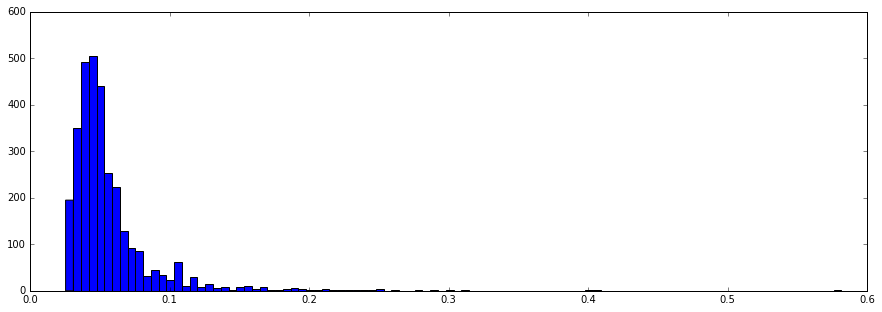

In [61]:
plt.subplots(figsize=(15,5))
Y, X, _ = plt.hist(pd_summary.TFIDF, bins=100)
pd_summary

---------------

### Trend of a field

In [7]:
nmax, lst_pub, dic_pub = question.iterator_query(KEYWORD, processing_date, batch_dic, maxn=10000)

Number of item 1511 / 10000
Number of item: 1511
Number of steps to perform: 16; size: 100
Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Finished !


In [8]:
lst_pub = time_dic_to_lst(dic_pub)

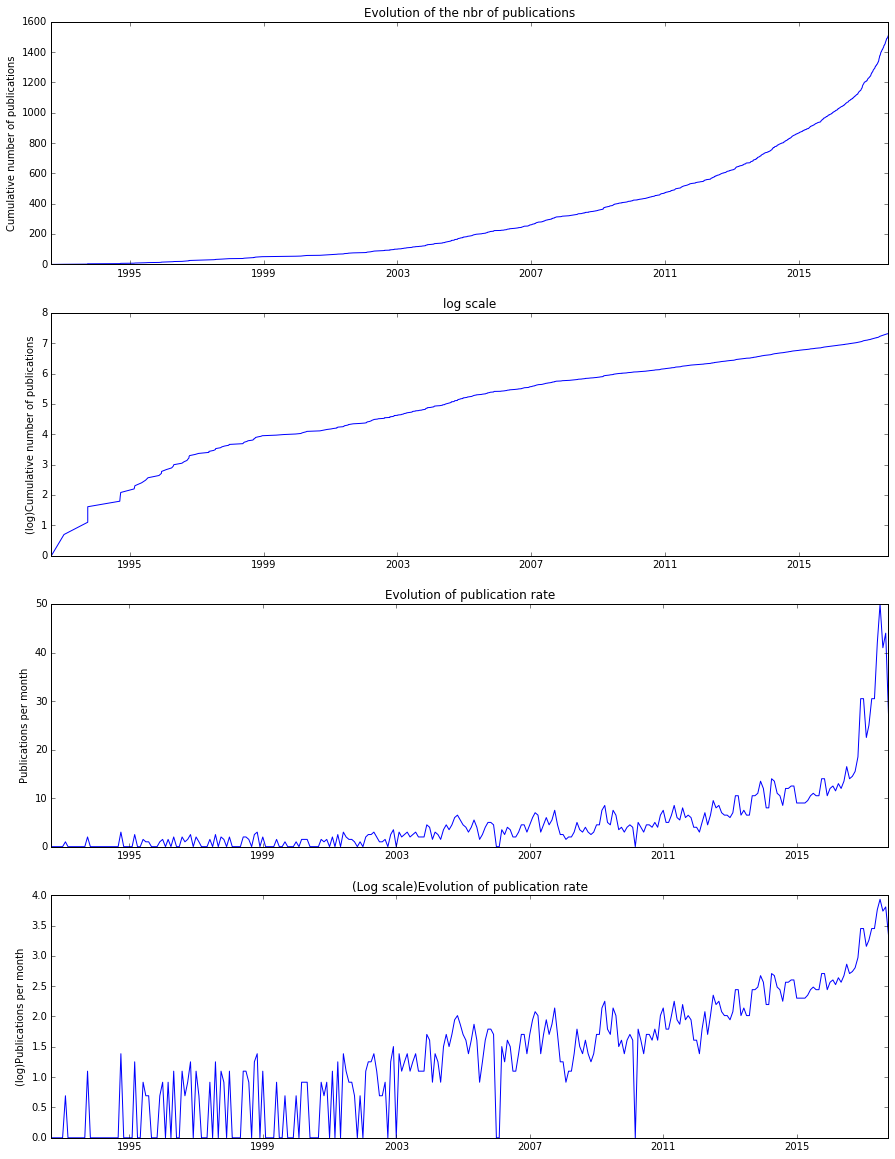

In [9]:
pd_nbr_publication_evolution = pd.DataFrame(index = lst_pub, data = np.arange(len(lst_pub)))

nplot = 4
fig, ax = plt.subplots(nplot, figsize=(15, 5 * nplot))
cnt = 0

ax[cnt].plot(pd_nbr_publication_evolution)
ax[cnt].set_title("Evolution of the nbr of publications")
ax[cnt].set_ylabel("Cumulative number of publications")
cnt += 1

ax[cnt].plot(np.log(1 + pd_nbr_publication_evolution))
ax[cnt].set_title("log scale")
ax[cnt].set_ylabel("(log)Cumulative number of publications")

cnt += 1

# Publication tate per month (or change M to something)
pd_month_rate = pd_nbr_publication_evolution.resample('M').mean().dropna().diff().resample('M').mean().fillna(0)
ax[cnt].plot(pd_month_rate)
ax[cnt].set_title("Evolution of publication rate")
ax[cnt].set_ylabel("Publications per month")
cnt += 1
# log scale
ax[cnt].plot(np.log(1 + pd_month_rate))
ax[cnt].set_title("(Log scale)Evolution of publication rate")
ax[cnt].set_ylabel("(log)Publications per month")
